ROC AUC Score: 0.7108781030830132
F1 Score: 0.3368213228035538
Confusion Matrix:
 [[6261 2793]
 [ 566  853]]
Precision: 0.23395501919912232
Recall: 0.6011275546159267


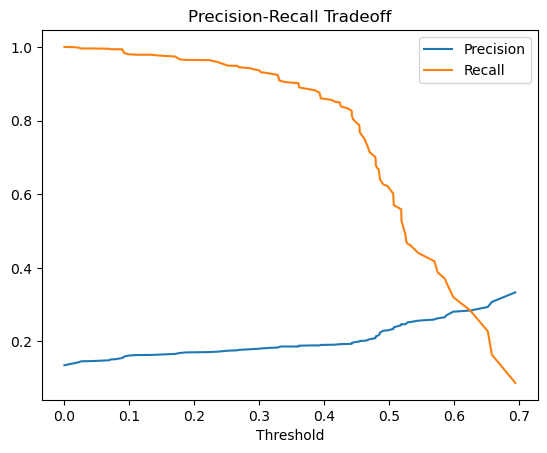

<Figure size 640x480 with 0 Axes>

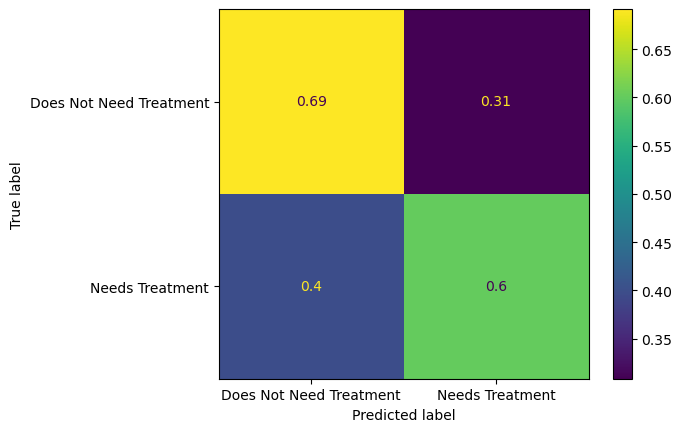

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight

screentime_data = pd.read_excel('../Res/Student Resources/Amal/Screentime_v_Mental_Health_Dataset.xlsx')

ref_dict_st = {x:y for x, y in zip(screentime_data['Screentime'].unique(),[0.5,4,3,2,1])}
ref_dict_mht = {x:y for x, y in zip(screentime_data['Mental Health Treatment'].unique(),[0,1])}
screentime_data['screen_time'] = screentime_data['Screentime'].apply(lambda x: ref_dict_st[x])
screentime_data['age'] = screentime_data['Age (Years)']
screentime_data['mental_health_treatment'] = screentime_data['Mental Health Treatment'].apply(lambda x: ref_dict_mht[x])

y = screentime_data['Mental Health Treatment']
X = screentime_data[['screen_time','age']]

rnd = 10

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = rnd, stratify=y)

class_weights = {'Does Not Need Treatment': 1, 'Needs Treatment': 5} 
sample_weights = compute_sample_weight(class_weights, train_y)
# sample_weights = compute_sample_weight('balanced', train_y)


forest_model = RandomForestClassifier(random_state=rnd, n_estimators=200)
# forest_model = DecisionTreeClassifier()
forest_model.fit(train_X, train_y, sample_weight=sample_weights)
mht_preds = forest_model.predict(val_X)
mht_probs = forest_model.predict_proba(val_X)[:, 1]  # Probabilities for class 1

print("ROC AUC Score:", roc_auc_score(val_y, mht_probs))
print("F1 Score:", f1_score(val_y, mht_preds, pos_label='Needs Treatment'))
print("Confusion Matrix:\n", confusion_matrix(val_y, mht_preds))
print("Precision:", precision_score(val_y, mht_preds, pos_label='Needs Treatment'))
print("Recall:", recall_score(val_y, mht_preds, pos_label='Needs Treatment'))

probs = forest_model.predict_proba(val_X)[:, 1]
precision, recall, thresholds = precision_recall_curve(val_y, probs, pos_label='Needs Treatment')

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.show()

plt.figure()

ConfusionMatrixDisplay.from_estimator(forest_model, val_X, val_y, normalize='true')

plt.show()